### Explore Phoenix Vendor Payments from 2014 - 2018

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import datetime

In [9]:
files = glob.glob('data/cleaned_data/*.csv')

payments = pd.concat([pd.read_csv(f, dtype={'Commitmt Item Name': 'str', 'Dept. Descrptn': 'str', 'Vendor Name': 'str'}) \
                      for f in files], sort=True)

In [10]:
payments.shape

(2215460, 5)

In [20]:
payments.dtypes

Check/Payment Date    datetime64[ns]
Commitmt Item Name            object
Dept. Descrptn                object
Invoice Net Amt              float64
Vendor Name                   object
dtype: object

In [38]:
# payments.index = payments.set_index('Vendor Name', inplace=True)

In [39]:
payments.head()

,Check/Payment Date,Commitmt Item Name,Dept. Descrptn,Invoice Net Amt
Vendor Name,,,,
3M COMPANY,2014-01-02,Inventories,Street Transportation,-34.78
3M COMPANY,2014-01-02,Inventories,Street Transportation,-69.55
3M COMPANY,2014-01-02,Inventories,Street Transportation,-77.00
AGS SAFETY & SUPPLY,2014-01-02,Inventories,Public Works,0.01
AMERICAN EUROCOPTER CORPORATION,2014-01-02,Inventories,Police,-0.79


#### Change columns to appropriate data types

In [13]:
# change Check/Payment Date to datetime format
payments['Check/Payment Date'] = pd.to_datetime(payments['Check/Payment Date'])

In [27]:
payments.dtypes

Check/Payment Date    datetime64[ns]
Commitmt Item Name            object
Dept. Descrptn                object
Invoice Net Amt              float64
Vendor Name                   object
dtype: object

### How do payments track year over year?

In [79]:
# payments['Year_Month'] = payments['Check/Payment Date'].apply(lambda x: 100*x.year + x.month)

payments['Year_Month'] = payments['Check/Payment Date'].apply(lambda x: str(x.year) + str(x.month))

# df['YearMonth'] = df['ArrivalDate'].map(lambda x: 100*x.year + x.month)


In [80]:
payments.head()

,Check/Payment Date,Commitmt Item Name,Dept. Descrptn,Invoice Net Amt,Year_Month,Year,Month
Vendor Name,,,,,,,
3M COMPANY,2014-01-02,Inventories,Street Transportation,-34.78,20141,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-69.55,20141,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-77.00,20141,2014,1
AGS SAFETY & SUPPLY,2014-01-02,Inventories,Public Works,0.01,20141,2014,1
AMERICAN EUROCOPTER CORPORATION,2014-01-02,Inventories,Police,-0.79,20141,2014,1


In [91]:
payments.groupby('Year_Month')['Invoice Net Amt'].sum().head()

Year_Month
20141     1.417693e+08
201410    1.272105e+08
201411    9.357684e+07
201412    2.691785e+08
20142     1.271078e+08
Name: Invoice Net Amt, dtype: float64

In [48]:
payments['Year'] = payments['Check/Payment Date'].apply(lambda x: x.year)
payments['Month'] = payments['Check/Payment Date'].apply(lambda x: x.month)

In [65]:
payments_yr_month = payments.groupby(['Year','Month'])['Invoice Net Amt'].sum().reset_index()

In [58]:
payments_yr_month['yr_mth'] = str(payments_yr_month['Year']) + '-' + str(payments_yr_month['Month'])

In [90]:
payments_yr_month.head().style.format({'Invoice Net Amt': '${0:,.0f}'})

,Year,Month,Invoice Net Amt
0,2014,1,"$141,769,299"
1,2014,2,"$127,107,812"
2,2014,3,"$112,525,885"
3,2014,4,"$127,144,447"
4,2014,5,"$135,778,420"


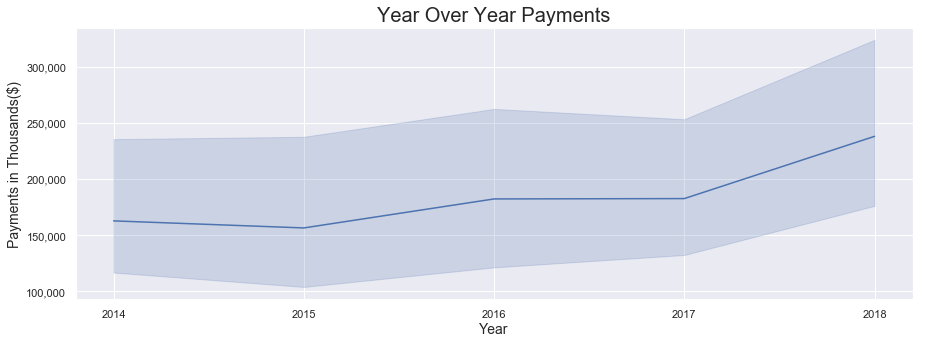

In [89]:
sns.set(rc={'figure.figsize':(15,5)})

ax = sns.lineplot(x=payments_yr_month.iloc[:,0], \
                  y=payments_yr_month.iloc[:,2], \
                  data=payments_yr_month)

plt.title("Year Over Year Payments",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Payments in Thousands($)",fontsize=14)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))

In [77]:
payments_yr_month.sort_values(by='Invoice Net Amt').head()

,Year,Month,Invoice Net Amt
22,2015,11,7.887680e+07
16,2015,5,8.623702e+07
13,2015,2,8.986921e+07
24,2016,1,9.175857e+07
10,2014,11,9.357684e+07


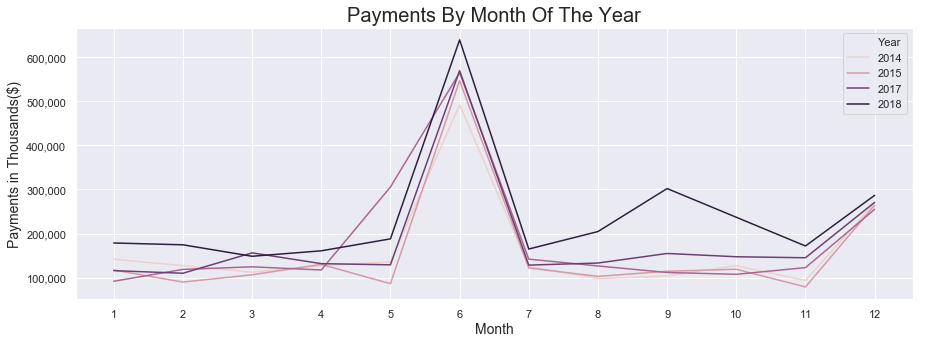

In [87]:
sns.set(rc={'figure.figsize':(15,5)})

ax = sns.lineplot(x=payments_yr_month.iloc[:,1], \
                  y=payments_yr_month.iloc[:,2], \
                  hue=payments_yr_month.iloc[:,0], \
                  data=payments_yr_month)

plt.title("Payments By Month Of The Year",fontsize=20)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Payments in Thousands($)",fontsize=14)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))